In [1]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm
import scipy
from scipy import stats

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
MA_fits = fits.open("real-finalmatch.fits", mode = "update")

In [3]:
MA_table = Table(MA_fits[1].data)
MA_table

PLATEIFU_1,MANGAID,OBJRA,OBJDEC,LOGMSTARS,SINI,VOPT,SESSION,EXP,RMS,LOGHILIM200KMS,PEAK,SNR,FHI,EFHI,LOGMHI,VHI,EV,WM50,WP50,WP20,W2P50,WF50,DW,PR,PL,AR,BR,AL,BL,NEGDET,BLSTRUCT,conflag,conf_prob,EFF_LOGMHI,stel_ha_diff_1,plateifu_2,ang_stellar,ang_stellar_err,ang_ha,ang_ha_err,stel_ha_diff_2,abs_diff
str11,str9,float64,float64,float64,float64,float32,str111,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float64,float64,float64,str12,float32,float32,float32,float32,float64,float64
9094-3703,1-265378,239.64501953125,27.618253707885742,10.656044006347656,0.3999831974506378,9365.512,ALFALFA,48.0,2.420882,9.457807,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0,0,0,0.0,9.457806587219238,0.0,9094-3703,17.0,4.5,346.0,1.75,329.0,31.0
,,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-32768,-32768,-32768,nan,nan,nan,10511-12702,174.0,9.75,143.0,1.8,31.0,31.0
8143-6103,1-44436,120.11665,41.66065,10.860682909057624,0.76223380853544,13062.2,AGBT17A_012_88-AGBT17A_012_91,896.989,1.3943157,9.35077,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0,0,0,0.0,9.350769996643066,0.0,8143-6103,311.0,3.5,279.5,0.5,31.5,31.5
8657-3701,1-107659,9.115751266479492,0.5770024657249451,9.635586738586426,0.653420090675354,12328.286,ALFALFA,48.0,3.4731734,9.851326,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0,0,0,0.0,9.851325988769531,0.0,8657-3701,261.0,15.5,292.5,39.75,31.5,31.5
,,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-32768,-32768,-32768,nan,nan,nan,8609-3703,99.5,5.5,131.0,4.5,31.5,31.5
,,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-32768,-32768,-32768,nan,nan,nan,12069-9102,1.0,2.75,328.5,0.5,327.5,32.5
,,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-32768,-32768,-32768,nan,nan,nan,9484-1901,354.0,3.25,27.0,3.25,327.0,33.0
7968-9102,1-180080,323.751629512,-0.511444352259,10.282157438875094,0.5266785418324625,9040.5,AGBT17A_012_153,767.2895,2.0748138,-999.0,0.007987181,2.849589,2.318361,0.2195221,9.94871,8990.909,24.136395,521.3664,516.2636,543.26666,530.9773,517.73553,3.7476647,6.6559834,5.6040564,18.179588,0.05851024,31.457245,-0.10990041,0,0,1,0.008606682821132527,9.948710441589355,0.0,7968-9102,247.5,10.25,213.5,2.25,34.0,34.0
8438-1901,1-474828,149.77255249023438,18.65435218811035,9.881587028503418,0.28614792227745056,7565.543,ALFALFA,48.0,2.4874055,9.285391,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0,0,0,0.0,9.285390853881836,0.0,8438-1901,53.5,18.0,87.5,6.0,34.0,34.0


In [4]:
# Extracting aligned galaxies
HImassFracA = []
stelMassA = []
for row in MA_table:
    if (row[4] > 8.25 and (row[10] > -999 or row[15] > -999) and not (row[42] > 30)):
        HImassFracA = np.append(HImassFracA, max(row[10], row[15]) - row[4])
        stelMassA = np.append(stelMassA, row[4])

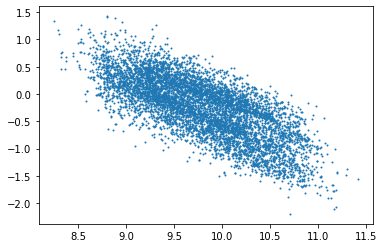

In [5]:
plt.scatter(stelMassA, HImassFracA, s=1);

In [6]:
# Extracting misaligned galaxies

HImassFracMA = []
stelMassMA = []
for row in MA_table:
    if (row[4] > 8.25 and (row[10] > -999 or row[15] > -999) and (row[42] > 30)):
        HImassFracMA = np.append(HImassFracMA, max(row[10], row[15]) - row[4])
        stelMassMA = np.append(stelMassMA, row[4])

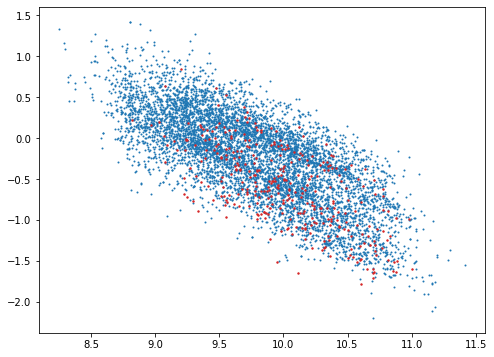

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(stelMassA, HImassFracA, s=1, color="tab:blue");
plt.scatter(stelMassMA, HImassFracMA, s=2, color="tab:red");

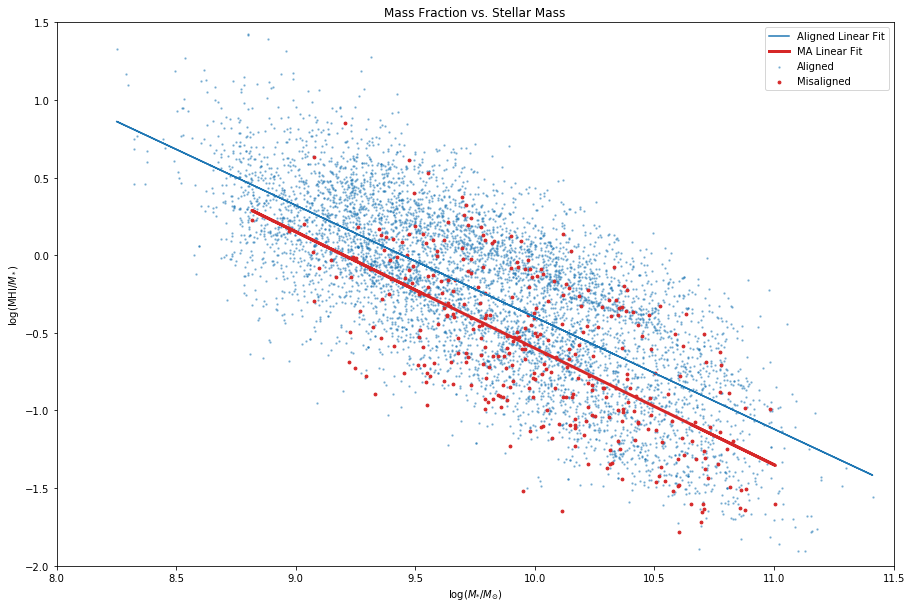

In [8]:
plt.figure(figsize=(15,10));

plt.scatter(stelMassA, HImassFracA, color="tab:blue", alpha=.4, s=2, label = "Aligned");
plt.xlim(8, 11.5)
plt.ylim(-2, 1.5)
plt.scatter(stelMassMA, HImassFracMA, s=8, color="tab:red", label = "Misaligned");

a, b = np.polyfit(stelMassA, HImassFracA, 1)
plt.plot(stelMassA, a*stelMassA+b, color="tab:blue", label = "Aligned Linear Fit")
c, d = np.polyfit(stelMassMA, HImassFracMA, 1)
plt.plot(stelMassMA, c*stelMassMA+d, color="tab:red", label = "MA Linear Fit", lw=3)

plt.xlabel("log($M_{*}/M_{\odot}$)")
plt.ylabel("log(MHI/$M_*$)")
plt.title("Mass Fraction vs. Stellar Mass")
plt.legend()

# plt.savefig("massFrac_w_LinFit.png")

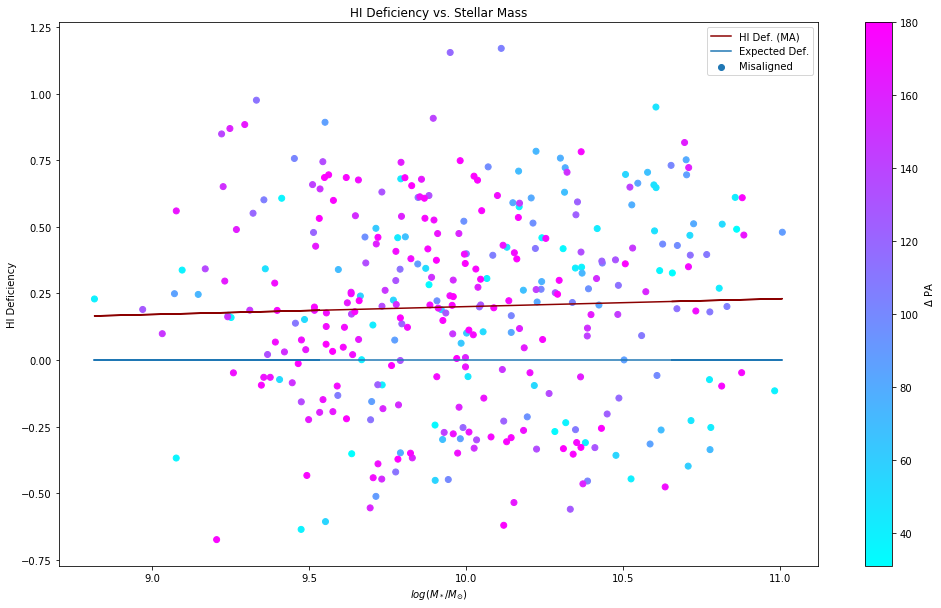

In [9]:
# plotting HI deficiency
HIdeficiencyMA = []
stelMassMA2 = []
MA_PA = []

for row in MA_table:
    # row[42] is MA angle, row[4] is LOGMSTARS, row[10] and row[15] are LOGMHI
    # y = ax+b is linear fit of all galaxies
    if (row[42] > 30 and row[4] > 8.25 and (row[10] > -999 or row[15] > -999)):
        HIdeficiencyMA = np.append(HIdeficiencyMA, (a*row[4]+b) - (max(row[10], row[15]) - row[4]))
        stelMassMA2 = np.append(stelMassMA2, row[4])
        MA_PA = np.append(MA_PA, row[42])

plt.figure(figsize=(17,10));

plt.scatter(stelMassMA2, HIdeficiencyMA, c=MA_PA, label = "Misaligned", cmap="cool");
e, f = np.polyfit(stelMassMA2, HIdeficiencyMA, 1)
plt.plot(stelMassMA2, e*stelMassMA+f, color="darkred", label = "HI Def. (MA)")
plt.plot(stelMassMA2, [0]*len(stelMassMA2), label = "Expected Def.");
plt.title("HI Deficiency vs. Stellar Mass")
plt.xlabel('$log(M_*/M_{\odot})$')
plt.ylabel('HI Deficiency');
plt.legend();
plt.colorbar(label="$\Delta$ PA")

# plt.savefig("HI_deficiency.png")

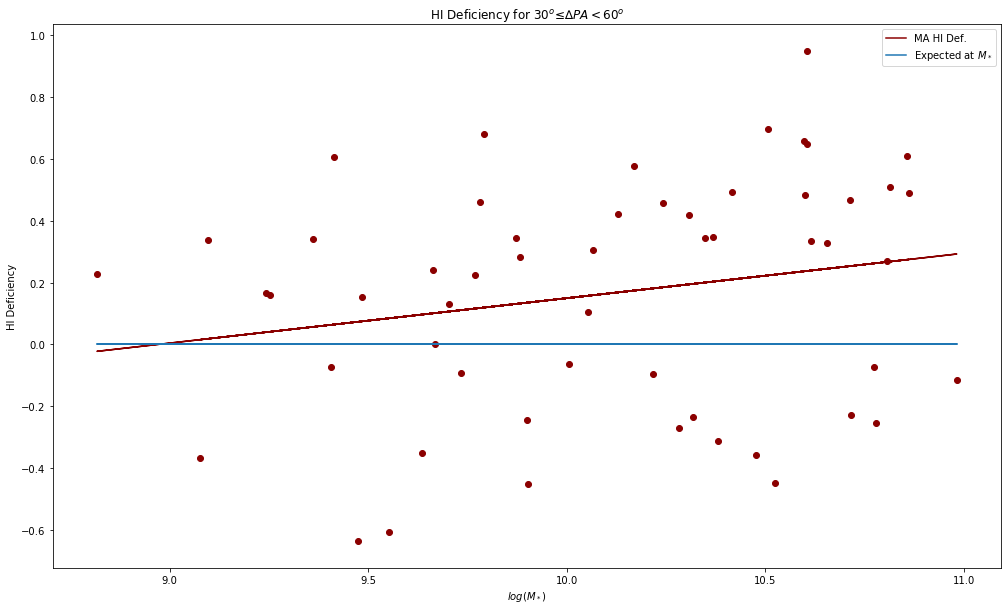

In [10]:
# plotting HI deficiency for 30≤∆PA<60
HIdeficiencyLowMA = []
stelMassLowMA = []

for row in MA_table:
    if ((row[42] >= 30 and row[42] < 60) and row[4] > 8.25 and (row[10] > -999 or row[15] > -999)):
        HIdeficiencyLowMA = np.append(HIdeficiencyLowMA, (a*row[4]+b) - (max(row[10], row[15]) - row[4]))
        stelMassLowMA = np.append(stelMassLowMA, row[4])

plt.figure(figsize=(17,10));

plt.scatter(stelMassLowMA, HIdeficiencyLowMA, color="darkred");
e, f = np.polyfit(stelMassLowMA, HIdeficiencyLowMA, 1)
plt.plot(stelMassLowMA, e*stelMassLowMA+f, color="darkred")
plt.plot(stelMassLowMA, [0]*len(stelMassLowMA));
plt.xlabel('$log(M_*)$')
plt.ylabel('HI Deficiency');
plt.title('HI Deficiency for $30^o≤∆PA<60^o$')
plt.legend(['MA HI Def.','Expected at $M_*$']);

# plt.savefig("HI_deficiency_lowMA.png")

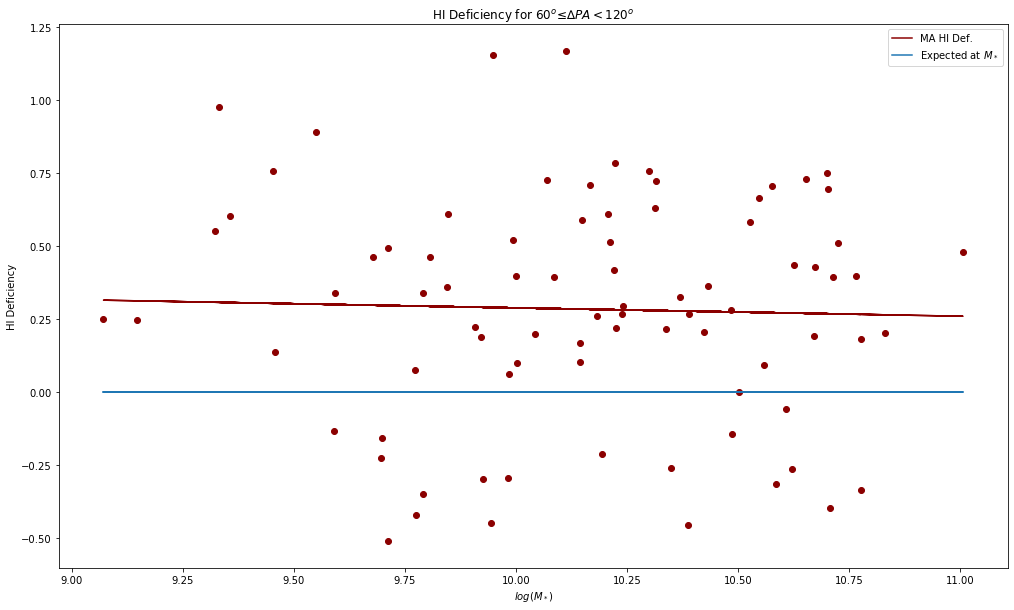

In [11]:
# plotting HI deficiency for 60≤∆PA<120
HIdeficiencyMidMA = []
stelMassMidMA = []

for row in MA_table:
    if ((row[42] >= 60 and row[42] < 120) and row[4] > 8.25 and (row[10] > -999 or row[15] > -999)):
        HIdeficiencyMidMA = np.append(HIdeficiencyMidMA, (a*row[4]+b) - (max(row[10], row[15]) - row[4]))
        stelMassMidMA = np.append(stelMassMidMA, row[4])

plt.figure(figsize=(17,10));

plt.scatter(stelMassMidMA, HIdeficiencyMidMA, color="darkred");
e, f = np.polyfit(stelMassMidMA, HIdeficiencyMidMA, 1)
plt.plot(stelMassMidMA, e*stelMassMidMA+f, color="darkred")
plt.plot(stelMassMidMA, [0]*len(stelMassMidMA));
plt.xlabel('$log(M_*)$')
plt.ylabel('HI Deficiency');
plt.title('HI Deficiency for $60^o≤∆PA<120^o$')
plt.legend(['MA HI Def.','Expected at $M_*$']);

# plt.savefig("HI_deficiency_midMA.png")

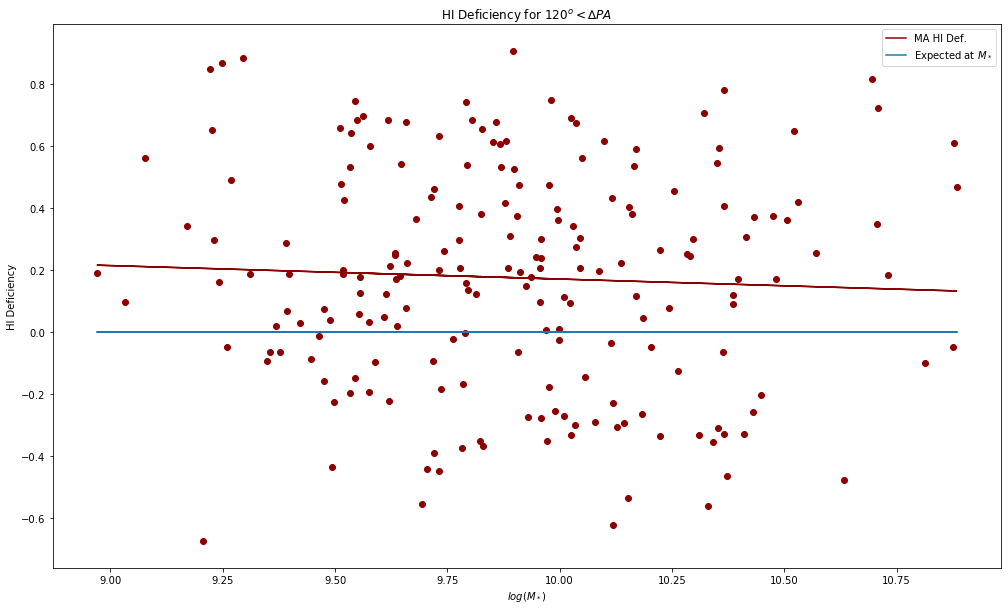

In [12]:
# plotting HI deficiency for 180<∆PA
HIdeficiencyCounter = []
stelMassCounter = []

for row in MA_table:
    if ((row[42] >= 120) and row[4] > 8.25 and (row[10] > -999 or row[15] > -999)):
        HIdeficiencyCounter = np.append(HIdeficiencyCounter, (a*row[4]+b) - (max(row[10], row[15]) - row[4]))
        stelMassCounter = np.append(stelMassCounter, row[4])

plt.figure(figsize=(17,10));

plt.scatter(stelMassCounter, HIdeficiencyCounter, color="darkred");
e, f = np.polyfit(stelMassCounter, HIdeficiencyCounter, 1)
plt.plot(stelMassCounter, e*stelMassCounter+f, color="darkred")
plt.plot(stelMassCounter, [0]*len(stelMassCounter));
plt.xlabel('$log(M_*)$')
plt.ylabel('HI Deficiency');
plt.title('HI Deficiency for $120^o<∆PA$')
plt.legend(['MA HI Def.','Expected at $M_*$']);

# plt.savefig("HI_deficiency_counter.png")

In [17]:
# Defining (or re-defining) intervals of misalignment for purposes of binning

# All MA Gal
stelMassLowMA = []
HIMassFracLowMA = []

for row in MA_table:
    if ((row[42] >= 30 and row[42] < 60) and row[4] > 8.25 and (row[10] > -999 or row[15] > -999)):
        HIMassFracLowMA = np.append(HIMassFracLowMA, max(row[10],row[15])-row[4])
        stelMassLowMA = np.append(stelMassLowMA, row[4])

stelMassMidMA = []
HIMassFracMidMA = []

for row in MA_table:
    if ((row[42] >= 60 and row[42] < 120) and row[4] > 8.25 and (row[10] > -999 or row[15] > -999)):
        HIMassFracMidMA = np.append(HIMassFracMidMA, max(row[10],row[15])-row[4])
        stelMassMidMA = np.append(stelMassMidMA, row[4])

stelMassCounter = []
HIMassFracCounter = []

for row in MA_table:
    if ((row[42] >= 120) and row[4] > 8.25 and (row[10] > -999 or row[15] > -999)):
        HIMassFracCounter = np.append(HIMassFracCounter, max(row[10],row[15])-row[4])
        stelMassCounter = np.append(stelMassCounter, row[4])

# Detected HI
stelMassLowMADet = []
HIMassFracLowMADet = []

for row in MA_table:
    if ((row[42] >= 30 and row[42] < 60) and row[4] > 8.25 and (row[15] > -999)):
        HIMassFracLowMADet = np.append(HIMassFracLowMADet, row[15]-row[4])
        stelMassLowMADet = np.append(stelMassLowMADet, row[4])

stelMassMidMADet = []
HIMassFracMidMADet = []

for row in MA_table:
    if ((row[42] >= 60 and row[42] < 120) and row[4] > 8.25 and (row[15] > -999)):
        HIMassFracMidMADet = np.append(HIMassFracMidMADet, row[15]-row[4])
        stelMassMidMADet = np.append(stelMassMidMADet, row[4])

stelMassCounterDet = []
HIMassFracCounterDet = []

for row in MA_table:
    if ((row[42] >= 120) and row[4] > 8.25 and (row[15] > -999)):
        HIMassFracCounterDet = np.append(HIMassFracCounterDet, row[15]-row[4])
        stelMassCounterDet = np.append(stelMassCounterDet, row[4])

stelMassAllMADet = []
HIMassFracAllMADet = []
MA_PA_Det = []

for row in MA_table:
    if ((row[42] >= 30) and row[4] > 8.25 and (row[15] > -999)):
        HIMassFracAllMADet = np.append(HIMassFracAllMADet, row[15]-row[4])
        stelMassAllMADet = np.append(stelMassAllMADet, row[4])
        MA_PA_Det = np.append(MA_PA_Det, row[42])


# HI Non-detections (Upper limits)
stelMassAllMALim = []
HIMassFracAllMALim = []
MA_PA_Lim = []

for row in MA_table:
    if ((row[42] >= 30) and row[4] > 8.25 and (row[10] > -999)):
        HIMassFracAllMALim = np.append(HIMassFracAllMALim, row[10]-row[4])
        stelMassAllMALim = np.append(stelMassAllMALim, row[4])
        MA_PA_Lim = np.append(MA_PA_Lim, row[42])

stelMassLowMALim = []
HIMassFracLowMALim = []

for row in MA_table:
    if ((row[42] >= 30 and row[42] < 60) and row[4] > 8.25 and (row[10] > -999)):
        HIMassFracLowMALim = np.append(HIMassFracLowMALim, row[10]-row[4])
        stelMassLowMALim = np.append(stelMassLowMALim, row[4])

stelMassMidMALim = []
HIMassFracMidMALim = []

for row in MA_table:
    if ((row[42] >= 60 and row[42] < 120) and row[4] > 8.25 and (row[10] > -999)):
        HIMassFracMidMALim = np.append(HIMassFracMidMALim, row[10]-row[4])
        stelMassMidMALim = np.append(stelMassMidMALim, row[4])

stelMassCounterLim = []
HIMassFracCounterLim = []

for row in MA_table:
    if ((row[42] >= 120) and row[4] > 8.25 and (row[10] > -999)):
        HIMassFracCounterLim = np.append(HIMassFracCounterLim, row[10]-row[4])
        stelMassCounterLim = np.append(stelMassCounterLim, row[4])

In [1]:
# Mass Fraction plot with binned averages

plt.figure(figsize=(20,11.5));

# Patrick Wang HC'27's code:

#adding binned data to the graph using stats.binned_statistic
Ameans,Aedgesmean,Anummean=scipy.stats.binned_statistic(stelMassA,HImassFracA,'mean',bins=6)
Astds,Aedgesstd,Anumstd=scipy.stats.binned_statistic(stelMassA,HImassFracA,'std',bins=6)

MAmeans,MAedgesmean,MAnummean=scipy.stats.binned_statistic(stelMassMA,HImassFracMA,'mean',bins=6)
MAstds,MAedgesstd,MAnumstd=scipy.stats.binned_statistic(stelMassMA,HImassFracMA,'std',bins=6)


plt.plot(stelMassA,HImassFracA,'.',color='tab:grey',label='Aligned',alpha=0.075)
'''
stelMassAllMADet = []
HIMassFracAllMADet = []
stelMassAllMALim = []
HIMassFracAllMALim = []
'''
plt.scatter(stelMassAllMADet, HIMassFracAllMADet, label = 'Misaligned Detections', color="blueviolet")
plt.scatter(stelMassAllMALim, HIMassFracAllMALim, marker="^", label = 'Misaligned Non-Detections', color="orchid")
# plt.plot(stelMassMA, HImassFracMA,c=MA_PA,label='Misaligned', cmap="cool", s=15)
#plt.colorbar(label="$\Delta$ PA")

plt.plot(Aedgesmean[:-1]+0.125,Ameans,color='tab:orange',ls='-',label='Aligned', lw=2)
plt.plot(MAedgesmean[:-1]+0.125,MAmeans,color='hotpink',ls='-',label='All Misaligned', lw=2)

'''
plt.hlines(Ameans,Aedgesmean[:-1],Aedgesmean[1:],colors='b',lw=4,alpha=0.9)
plt.hlines(MAmeans,MAedgesmean[:-1],MAedgesmean[1:],colors='r',lw=3,alpha=0.9)
'''

'''
# Grouping detections and non-detections together
HIMassFracLowMAmeans,HIMassFracLowMAedgesmean,HIMassFracLowMAnummean = scipy.stats.binned_statistic(stelMassLowMA,HIMassFracLowMA,'mean',bins=np.arange(8.5,11.25,0.25))
HIMassFracLowMAstds,HIMassFracLowMAedgesstd,HIMassFracLowMAnumstd = scipy.stats.binned_statistic(stelMassLowMA,HIMassFracLowMA,'std',bins=np.arange(8.5,11.25,0.25))
plt.plot(HIMassFracLowMAedgesmean[:-1]+0.125,HIMassFracLowMAmeans,color='tab:red',ls='--',label='Binned Low MA HI Mass Fraction', lw=2)

HIMassFracMidMAmeans,HIMassFracMidMAedgesmean,HIMassFracMidMAnummean = scipy.stats.binned_statistic(stelMassMidMA,HIMassFracMidMA,'mean',bins=np.arange(8.5,11.25,0.25))
HIMassFracMidMAstds,HIMassFracMidMAedgesstd,HIMassFracMidMAnumstd = scipy.stats.binned_statistic(stelMassMidMA,HIMassFracMidMA,'std',bins=np.arange(8.5,11.25,0.25))
plt.plot(HIMassFracMidMAedgesmean[:-1]+0.125,HIMassFracMidMAmeans,color='tab:green',ls='--',label='Binned Mid MA HI Mass Fraction', lw=2)

HIMassFracCountermeans,HIMassFracCounteredgesmean,HIMassFracCounternummean = scipy.stats.binned_statistic(stelMassCounter,HIMassFracCounter,'mean',bins=np.arange(8.5,11.25,0.25))
HIMassFracCounterstds,HIMassFracCounteredgesstd,HIMassFracCounternumstd = scipy.stats.binned_statistic(stelMassCounter,HIMassFracCounter,'std',bins=np.arange(8.5,11.25,0.25))
plt.plot(HIMassFracCounteredgesmean[:-1]+0.125,HIMassFracCountermeans,color='tab:blue',ls='--',label='Binned Counter HI Mass Fraction', lw=2)
'''

# Binning detections and non-detections separately
# Detections
HIMassFracLowMADetmeans,HIMassFracLowMADetedgesmean,HIMassFracLowMADetnummean = scipy.stats.binned_statistic(stelMassLowMADet,HIMassFracLowMADet,'mean',bins=6)
HIMassFracLowMADetstds,HIMassFracLowMADetedgesstd,HIMassFracLowMADetnumstd = scipy.stats.binned_statistic(stelMassLowMADet,HIMassFracLowMADet,'std',bins=6)
plt.plot(HIMassFracLowMADetedgesmean[:-1]+0.125,HIMassFracLowMADetmeans,color='darkred',ls='--',label='Low ∆PA (Detections)', lw=2)

HIMassFracMidMADetmeans,HIMassFracMidMADetedgesmean,HIMassFracMidMADetnummean = scipy.stats.binned_statistic(stelMassMidMADet,HIMassFracMidMADet,'mean',bins=6)
HIMassFracMidMADetstds,HIMassFracMidMADetedgesstd,HIMassFracMidMADetnumstd = scipy.stats.binned_statistic(stelMassMidMADet,HIMassFracMidMADet,'std',bins=6)
plt.plot(HIMassFracMidMADetedgesmean[:-1]+0.125,HIMassFracMidMADetmeans,color='darkgreen',ls='--',label='Mid ∆PA (Detections)', lw=2)

HIMassFracCounterDetmeans,HIMassFracCounterDetedgesmean,HIMassFracCounterDetnummean = scipy.stats.binned_statistic(stelMassCounterDet,HIMassFracCounterDet,'mean',bins=6)
HIMassFracCounterDetstds,HIMassFracCounterDetedgesstd,HIMassFracCounterDetnumstd = scipy.stats.binned_statistic(stelMassCounterDet,HIMassFracCounterDet,'std',bins=6)
plt.plot(HIMassFracCounterDetedgesmean[:-1]+0.125,HIMassFracCounterDetmeans,color='darkblue',ls='--',label='Counter-rotating (Detections)', lw=2)

# Limits
HIMassFracLowMALimmeans,HIMassFracLowMALimedgesmean,HIMassFracLowMALimnummean = scipy.stats.binned_statistic(stelMassLowMALim,HIMassFracLowMALim,'mean',bins=6)
HIMassFracLowMALimstds,HIMassFracLowMALimedgesstd,HIMassFracLowMALimnumstd = scipy.stats.binned_statistic(stelMassLowMALim,HIMassFracLowMALim,'std',bins=6)
plt.plot(HIMassFracLowMALimedgesmean[:-1]+0.125,HIMassFracLowMALimmeans,color='tab:red',ls='--',label='Low ∆PA (Upper Limits)', lw=2)

HIMassFracMidMALimmeans,HIMassFracMidMALimedgesmean,HIMassFracMidMALimnummean = scipy.stats.binned_statistic(stelMassMidMALim,HIMassFracMidMALim,'mean',bins=6)
HIMassFracMidMALimstds,HIMassFracMidMALimedgesstd,HIMassFracMidMALimnumstd = scipy.stats.binned_statistic(stelMassMidMALim,HIMassFracMidMALim,'std',bins=6)
plt.plot(HIMassFracMidMALimedgesmean[:-1]+0.125,HIMassFracMidMALimmeans,color='tab:green',ls='--',label='Mid ∆PA (Upper Limits)', lw=2)

HIMassFracCounterLimmeans,HIMassFracCounterLimedgesmean,HIMassFracCounterLimnummean = scipy.stats.binned_statistic(stelMassCounterLim,HIMassFracCounterLim,'mean',bins=6)
HIMassFracCounterLimstds,HIMassFracCounterLimedgesstd,HIMassFracCounterLimnumstd = scipy.stats.binned_statistic(stelMassCounterLim,HIMassFracCounterLim,'std',bins=6)
plt.plot(HIMassFracCounterLimedgesmean[:-1]+0.125,HIMassFracCounterLimmeans,color='tab:blue',ls='--',label='Counter-rotating (Upper Limits)', lw=2)

plt.title('Mass Fraction vs. Stellar Mass')
plt.xlabel('$log(M_{\star}/M_\odot)$')
plt.ylabel('$log(M_{HI}/M_\star)$')

plt.xlim(8.4,11.25)
plt.ylim(-2,1.25)
plt.legend(fontsize=12);

# plt.savefig("massFrac_binned_withAux_dividedPA.png")

NameError: name 'plt' is not defined

In [39]:
# Defining deficiencies grouped by PA
# Detections
HIdefLowMADet = []
stelMassLowMADet = []

for row in MA_table:
    if ((row[42] >= 30 and row[42] < 60) and row[4] > 8.25 and (row[15] > -999)):
        HIdefLowMADet = np.append(HIdefLowMADet, (a*row[4]+b) - (max(row[10], row[15]) - row[4]))
        stelMassLowMADet = np.append(stelMassLowMADet, row[4])

HIdefMidMADet = []
stelMassMidMADet = []

for row in MA_table:
    if ((row[42] >= 60 and row[42] < 120) and row[4] > 8.25 and (row[15] > -999)):
        HIdefMidMADet = np.append(HIdefMidMADet, (a*row[4]+b) - (max(row[10], row[15]) - row[4]))
        stelMassMidMADet = np.append(stelMassMidMADet, row[4])

HIdefCounterDet = []
stelMassCounterDet = []

for row in MA_table:
    if ((row[42] >= 120) and row[4] > 8.25 and (row[15] > -999)):
        HIdefCounterDet = np.append(HIdefCounterDet, (a*row[4]+b) - (max(row[10], row[15]) - row[4]))
        stelMassCounterDet = np.append(stelMassCounterDet, row[4])
        
        
#Limits
HIdefLowMALim = []
stelMassLowMALim = []

for row in MA_table:
    if ((row[42] >= 30 and row[42] < 60) and row[4] > 8.25 and (row[10] > -999)):
        HIdefLowMALim = np.append(HIdefLowMALim, (a*row[4]+b) - (max(row[10], row[15]) - row[4]))
        stelMassLowMALim = np.append(stelMassLowMALim, row[4])

HIdefMidMALim = []
stelMassMidMALim = []

for row in MA_table:
    if ((row[42] >= 60 and row[42] < 120) and row[4] > 8.25 and (row[10] > -999)):
        HIdefMidMALim = np.append(HIdefMidMALim, (a*row[4]+b) - (max(row[10], row[15]) - row[4]))
        stelMassMidMALim = np.append(stelMassMidMALim, row[4])

HIdefCounterLim = []
stelMassCounterLim = []

for row in MA_table:
    if ((row[42] >= 120) and row[4] > 8.25 and (row[10] > -999)):
        HIdefCounterLim = np.append(HIdefCounterLim, (a*row[4]+b) - (max(row[10], row[15]) - row[4]))
        stelMassCounterLim = np.append(stelMassCounterLim, row[4])

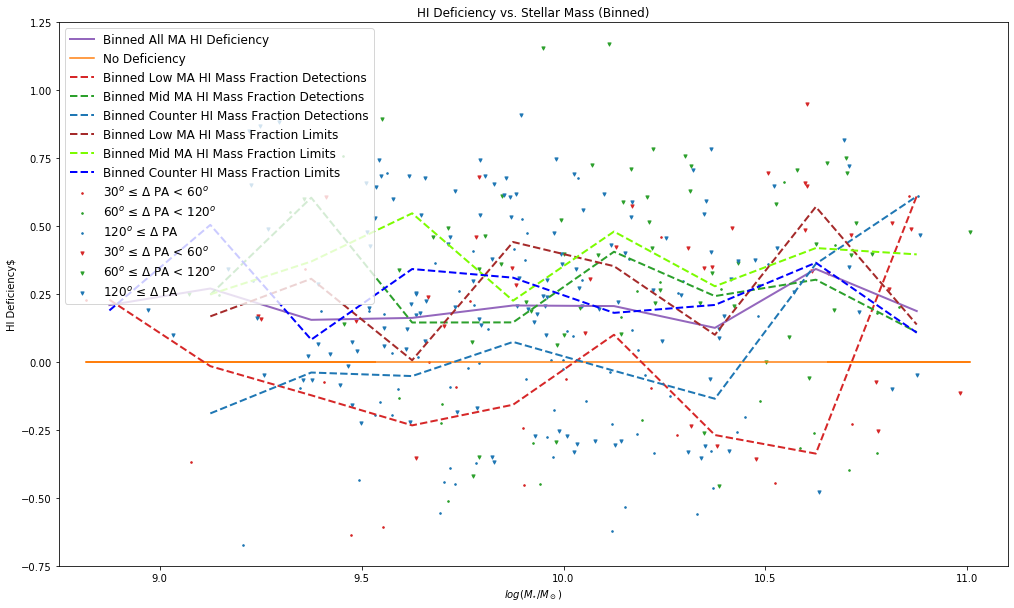

In [43]:
# HI Deficiency plot with binned averages

plt.figure(figsize=(17,10));

# HIdeficiencyMA
# stelMassMA2

HIdefMAmeans,HIdefMAedgesmean,HIdefMAnummean = scipy.stats.binned_statistic(stelMassMA,HIdeficiencyMA,'mean',bins=np.arange(8.5,11.25,0.25))
HIdefMAstds,HIdefMAedgesstd,HIdefMAnumstd = scipy.stats.binned_statistic(stelMassMA,HIdeficiencyMA,'std',bins=np.arange(8.5,11.25,0.25))
plt.plot(HIdefMAedgesmean[:-1]+0.125,HIdefMAmeans,color='tab:purple',ls='-',label='Binned All MA HI Deficiency', lw=2)

'''
# Combining detections and non-detections
HIdefLowMAmeans,HIdefLowMAedgesmean,HIdefLowMAnummean = scipy.stats.binned_statistic(stelMassLowMA,HIdeficiencyLowMA,'mean',bins=np.arange(8.5,11.25,0.25))
HIdefLowMAstds,HIdefLowMAedgesstd,HIdefLowMAnumstd = scipy.stats.binned_statistic(stelMassLowMA,HIdeficiencyLowMA,'std',bins=np.arange(8.5,11.25,0.25))
plt.plot(HIdefLowMAedgesmean[:-1]+0.125,HIdefLowMAmeans,color='tab:red',ls='--',label='Binned Low MA HI Deficiency', lw=2)

HIdefMidMAmeans,HIdefMidMAedgesmean,HIdefMidMAnummean = scipy.stats.binned_statistic(stelMassMidMA,HIdeficiencyMidMA,'mean',bins=np.arange(8.5,11.25,0.25))
HIdefMidMAstds,HIdefMidMAedgesstd,HIdefMidMAnumstd = scipy.stats.binned_statistic(stelMassMidMA,HIdeficiencyMidMA,'std',bins=np.arange(8.5,11.25,0.25))
plt.plot(HIdefMidMAedgesmean[:-1]+0.125,HIdefMidMAmeans,color='tab:green',ls='--',label='Binned Mid MA HI Deficiency', lw=2)

HIdefCountermeans,HIdefCounteredgesmean,HIdefCounternummean = scipy.stats.binned_statistic(stelMassCounter,HIdeficiencyCounter,'mean',bins=np.arange(8.5,11.25,0.25))
HIdefCounterstds,HIdefCounteredgesstd,HIdefCounternumstd = scipy.stats.binned_statistic(stelMassCounter,HIdeficiencyCounter,'std',bins=np.arange(8.5,11.25,0.25))
plt.plot(HIdefCounteredgesmean[:-1]+0.125,HIdefCountermeans,color='tab:blue',ls='--',label='Binned Counter HI Deficiency', lw=2)
'''

# Plot baseline expected deficiency (0)
plt.plot(stelMassMA2, [0]*len(stelMassMA2), label = "No Deficiency", color = "tab:orange");

'''
plt.plot(stelMassLowMA,HIdeficiencyLowMA,".",color="tab:red", label='30$^o$ ≤ $\Delta$ PA < 60$^o$ (x55)')
plt.plot(stelMassMidMA,HIdeficiencyMidMA,".",color="tab:green",label='60$^o$ ≤ $\Delta$ PA < 120$^o$ (x83)')
plt.plot(stelMassCounter,HIdeficiencyCounter,".",color="tab:blue",label='120$^o$ ≤ $\Delta$ PA (x199)')
'''
plt.scatter(stelMassLowMADet,HIdeficiencyLowMADet,marker=".",color="tab:red", label='30$^o$ ≤ $\Delta$ PA < 60$^o$', s=10)
plt.scatter(stelMassMidMADet,HIdeficiencyMidMADet,marker=".",color="tab:green",label='60$^o$ ≤ $\Delta$ PA < 120$^o$', s=10)
plt.scatter(stelMassCounterDet,HIdeficiencyCounterDet,marker=".",color="tab:blue",label='120$^o$ ≤ $\Delta$ PA', s=10)

plt.scatter(stelMassLowMALim,HIdeficiencyLowMALim,marker="v",color="tab:red", label='30$^o$ ≤ $\Delta$ PA < 60$^o$', s=10)
plt.scatter(stelMassMidMALim,HIdeficiencyMidMALim,marker="v",color="tab:green",label='60$^o$ ≤ $\Delta$ PA < 120$^o$', s=10)
plt.scatter(stelMassCounterLim,HIdeficiencyCounterLim,marker="v",color="tab:blue",label='120$^o$ ≤ $\Delta$ PA', s=10)

# Binning detections and non-detections separately
# Detections
HIdefLowMADetmeans,HIdefLowMADetedgesmean,HIdefLowMADetnummean = scipy.stats.binned_statistic(stelMassLowMADet,HIdefLowMADet,'mean',bins=np.arange(8.5,11.25,0.25))
HIdefLowMADetstds,HIdefLowMADetedgesstd,HIdefLowMADetnumstd = scipy.stats.binned_statistic(stelMassLowMADet,HIdefLowMADet,'std',bins=np.arange(8.5,11.25,0.25))
plt.plot(HIdefLowMADetedgesmean[:-1]+0.125,HIdefLowMADetmeans,color='tab:red',ls='--',label='Binned Low MA HI Mass Fraction Detections', lw=2)

HIdefMidMADetmeans,HIdefMidMADetedgesmean,HIdefMidMADetnummean = scipy.stats.binned_statistic(stelMassMidMADet,HIdefMidMADet,'mean',bins=np.arange(8.5,11.25,0.25))
HIdefMidMADetstds,HIdefMidMADetedgesstd,HIdefMidMADetnumstd = scipy.stats.binned_statistic(stelMassMidMADet,HIdefMidMADet,'std',bins=np.arange(8.5,11.25,0.25))
plt.plot(HIdefMidMADetedgesmean[:-1]+0.125,HIdefMidMAmeans,color='tab:green',ls='--',label='Binned Mid MA HI Mass Fraction Detections', lw=2)

HIdefCounterDetmeans,HIdefCounterDetedgesmean,HIdefCounterDetnummean = scipy.stats.binned_statistic(stelMassCounterDet,HIdefCounterDet,'mean',bins=np.arange(8.5,11.25,0.25))
HIdefCounterDetstds,HIdefCounterDetedgesstd,HIdefCounterDetnumstd = scipy.stats.binned_statistic(stelMassCounterDet,HIdefCounterDet,'std',bins=np.arange(8.5,11.25,0.25))
plt.plot(HIdefCounterDetedgesmean[:-1]+0.125,HIdefCounterDetmeans,color='tab:blue',ls='--',label='Binned Counter HI Mass Fraction Detections', lw=2)

# Limits
HIdefLowMALimmeans,HIdefLowMALimedgesmean,HIdefLowMALimnummean = scipy.stats.binned_statistic(stelMassLowMALim,HIdefLowMALim,'mean',bins=np.arange(8.5,11.25,0.25))
HIdefLowMALimstds,HIdefLowMALimedgesstd,HIdefLowMALimnumstd = scipy.stats.binned_statistic(stelMassLowMALim,HIdefLowMALim,'std',bins=np.arange(8.5,11.25,0.25))
plt.plot(HIdefLowMALimedgesmean[:-1]+0.125,HIdefLowMALimmeans,color='brown',ls='--',label='Binned Low MA HI Mass Fraction Limits', lw=2)

HIdefMidMALimmeans,HIdefMidMALimedgesmean,HIdefMidMALimnummean = scipy.stats.binned_statistic(stelMassMidMALim,HIdefMidMALim,'mean',bins=np.arange(8.5,11.25,0.25))
HIdefMidMALimstds,HIdefMidMALimedgesstd,HIdefMidMALimnumstd = scipy.stats.binned_statistic(stelMassMidMALim,HIdefMidMALim,'std',bins=np.arange(8.5,11.25,0.25))
plt.plot(HIdefMidMALimedgesmean[:-1]+0.125,HIdefMidMALimmeans,color='lawngreen',ls='--',label='Binned Mid MA HI Mass Fraction Limits', lw=2)

HIdefCounterLimmeans,HIdefCounterLimedgesmean,HIdefCounterLimnummean = scipy.stats.binned_statistic(stelMassCounterLim,HIdefCounterLim,'mean',bins=np.arange(8.5,11.25,0.25))
HIdefCounterLimstds,HIdefCounterLimedgesstd,HIdefCounterLimnumstd = scipy.stats.binned_statistic(stelMassCounterLim,HIdefCounterLim,'std',bins=np.arange(8.5,11.25,0.25))
plt.plot(HIdefCounterLimedgesmean[:-1]+0.125,HIdefCounterLimmeans,color='blue',ls='--',label='Binned Counter HI Mass Fraction Limits', lw=2)



# Bars showing bins
# plt.hlines(MAmeans,MAedgesmean[:-1],MAedgesmean[1:],colors='r',lw=3,alpha=0.9)


plt.title('HI Deficiency vs. Stellar Mass (Binned)')
plt.xlabel('$log(M_{\star}/M_\odot)$')
plt.ylabel('HI Deficiency$')

plt.xlim(8.75,11.1)
plt.ylim(-.75,1.25)
plt.legend(fontsize=12);

# plt.savefig("HI_deficiency_binned_dividedPA.png")